Rata-rata ozon saat QBO positif: 5.51 ± 0.15
Rata-rata ozon saat QBO negatif: 5.33 ± 0.15
Uji t: t = 11.887, p-value = 0.000


C:\Users\HP\AppData\Local\Temp\ipykernel_22376\3497827451.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ozon_qbo_pos, ozon_qbo_neg], labels=['QBO Positif', 'QBO Negatif'])


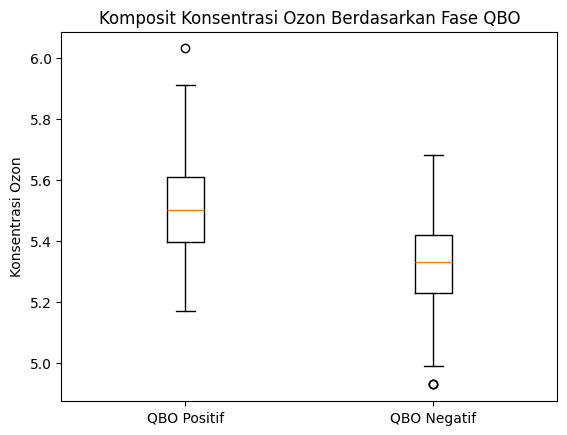

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Baca data dari file Excel
# Ganti sheet_name jika diperlukan, atau hapus jika hanya ada satu sheet
data = pd.read_excel('Data Gabungan.xlsx', sheet_name=0)

# Pastikan kolom bernama 'ozon' dan 'QBO'
if not {'TCO', 'QBO'}.issubset(data.columns):
    raise ValueError("Pastikan file memiliki kolom 'TCO' dan 'QBO'.")

# Definisikan threshold QBO untuk memisahkan fase positif dan negatif
threshold = 0

# Buat dua grup berdasarkan QBO
ozon_qbo_pos = data.loc[data['QBO'] > threshold, 'TCO']
ozon_qbo_neg = data.loc[data['QBO'] < threshold, 'TCO']

# Hitung rata-rata dan standar deviasi
mean_pos = ozon_qbo_pos.mean()
std_pos = ozon_qbo_pos.std()
mean_neg = ozon_qbo_neg.mean()
std_neg = ozon_qbo_neg.std()

print(f'Rata-rata ozon saat QBO positif: {mean_pos:.2f} ± {std_pos:.2f}')
print(f'Rata-rata ozon saat QBO negatif: {mean_neg:.2f} ± {std_neg:.2f}')

# Uji t untuk membandingkan kedua grup
t_stat, p_val = ttest_ind(ozon_qbo_pos, ozon_qbo_neg, equal_var=False)
print(f'Uji t: t = {t_stat:.3f}, p-value = {p_val:.3f}')

# Visualisasi hasil komposit
plt.boxplot([ozon_qbo_pos, ozon_qbo_neg], labels=['QBO Positif', 'QBO Negatif'])
plt.ylabel('Konsentrasi Ozon')
plt.title('Komposit Konsentrasi Ozon Berdasarkan Fase QBO')
plt.show()

In [ ]:
import pandas as pd

# Load Excel file
file_path = "Data Gabungan.xlsx"
excel_file = pd.ExcelFile(file_path)

# Tampilkan nama-nama sheet
sheet_names = excel_file.sheet_names
sheet_names

# Baca isi dari Sheet1
df = excel_file.parse('Sheet1')

# Tampilkan 5 baris pertama dan tipe data
df.head(), df.dtypes

In [ ]:
# Salin dataframe agar bisa dimodifikasi
df_comp = df.copy()

# Definisikan fase QBO dan SOI
df_comp['QBO_phase'] = df_comp['QBO'].apply(lambda x: 'Timur' if x >= 0 else 'Barat')
df_comp['SOI_phase'] = df_comp['SOI'].apply(lambda x: 'LaNina' if x >= 0 else 'ElNino')

# Gabungkan jadi satu kategori gabungan
df_comp['Gabungan'] = df_comp['QBO_phase'] + ' + ' + df_comp['SOI_phase']

# Hitung rata-rata index curah hujan untuk masing-masing kombinasi
composite_result = df_comp.groupby('Gabungan')['Index'].mean().reset_index()
composite_result.columns = ['Fase QBO + SOI', 'Rata-rata Indeks Curah Hujan']
composite_result

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plot bar chart
sns.barplot(data=composite_result, x='Fase QBO + SOI', y='Rata-rata Indeks Curah Hujan', palette='coolwarm')

# Tambahkan garis nol dan label
plt.axhline(0, color='gray', linestyle='--')
plt.title('Analisis Komposit Indeks Curah Hujan\nberdasarkan Fase QBO dan SOI')
plt.ylabel('Rata-rata Indeks Curah Hujan')
plt.xlabel('Kombinasi Fase QBO + SOI')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind
from itertools import combinations

# Ambil semua kombinasi pasangan unik dari kategori 'Gabungan'
combinations_list = list(combinations(df_comp['Gabungan'].unique(), 2))

# Simpan hasil uji t yang signifikan
significant_results = []

# Lakukan t-test untuk tiap pasangan
for combo in combinations_list:
    group1 = df_comp[df_comp['Gabungan'] == combo[0]]['Index']
    group2 = df_comp[df_comp['Gabungan'] == combo[1]]['Index']
    stat, pval = ttest_ind(group1, group2, equal_var=False)  # Gunakan Welch's t-test
    if pval < 0.05:
        significant_results.append({
            'Kombinasi': f"{combo[0]} vs {combo[1]}",
            'p-value': pval,
            'Rata-rata 1': group1.mean(),
            'Rata-rata 2': group2.mean()
        })

# Tampilkan hasil signifikan
pd.DataFrame(significant_results)